In [47]:
from scipy import stats
import numpy as np

import matplotlib.pyplot as plt

In [19]:
rep = 10**2

In [35]:
X0 = X(.3,rep); X0

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [34]:
def X(p,num):
    return stats.bernoulli.rvs(size=num,p=p)

In [21]:
def N(t,X):
    return np.sum(X[:5])

In [11]:
X[:5]

array([0, 1, 0, 1, 0])

In [30]:
def T(k,X):
    if k==0:
        return -1
    s = 0
    for t in range(rep):
        if X[t]==1:
            s += 1
        if s==k:
            return t
    return None

In [31]:
def L(k,X):
    assert(k>=1)
    return T(k,X) - T(k-1,X)

In [44]:
Lvals = [L(3,X(.3,rep)) for _ in range(10**3)]

(0.0, 300.0)

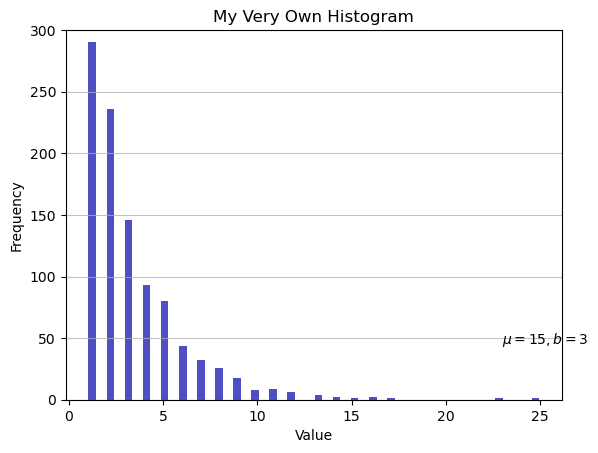

In [59]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=Lvals, bins=50, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)